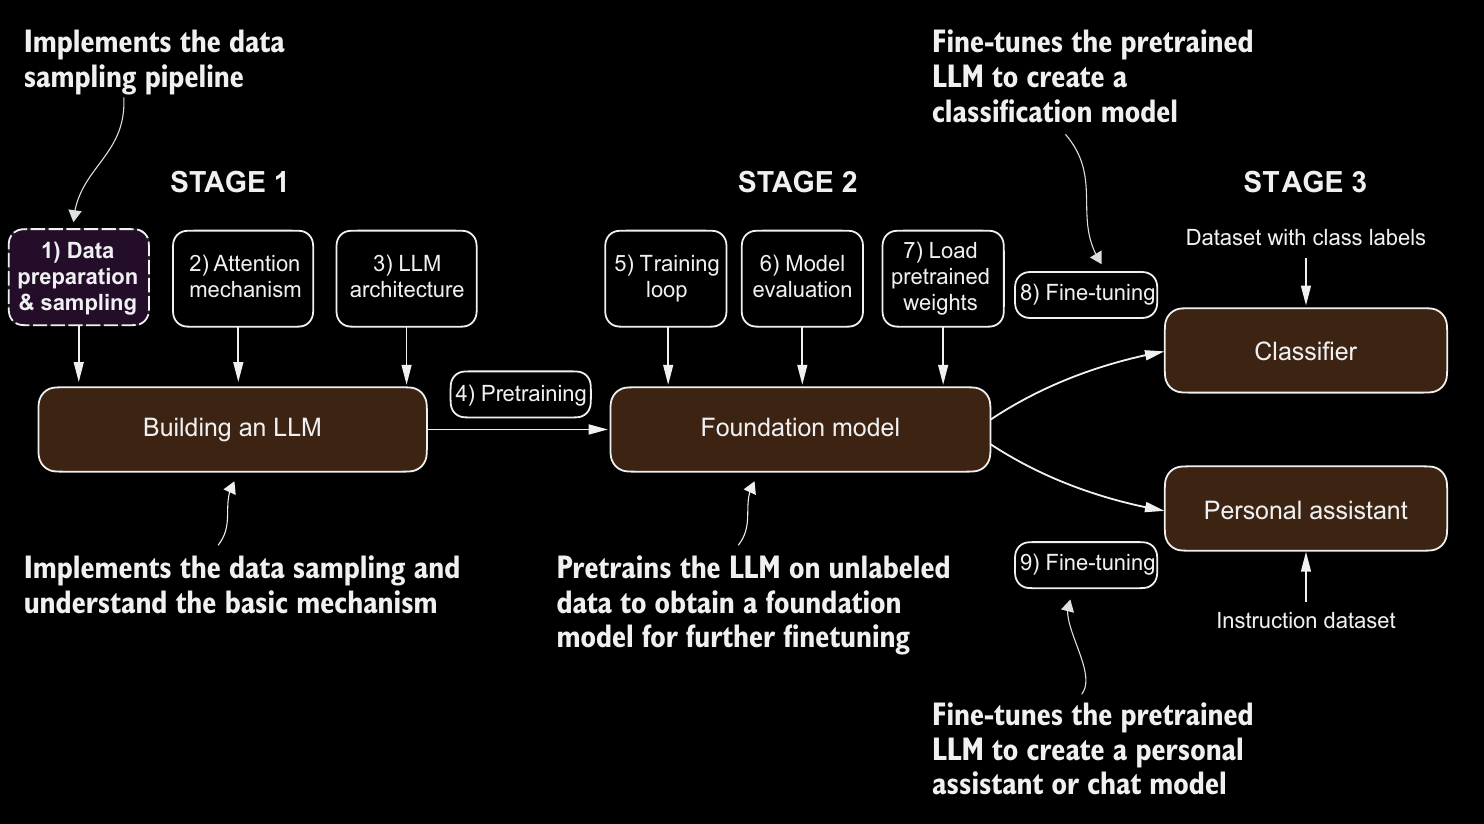

We will be focusing on step 1 of stage 1:

DNNs cannot process raw text directly. Since raw text is categorical and isn't compatible with the mathematical operations used while training neural networks.

The concept of converting data into a vector format is called embedding.
Using NNs different datatypes can be embedded
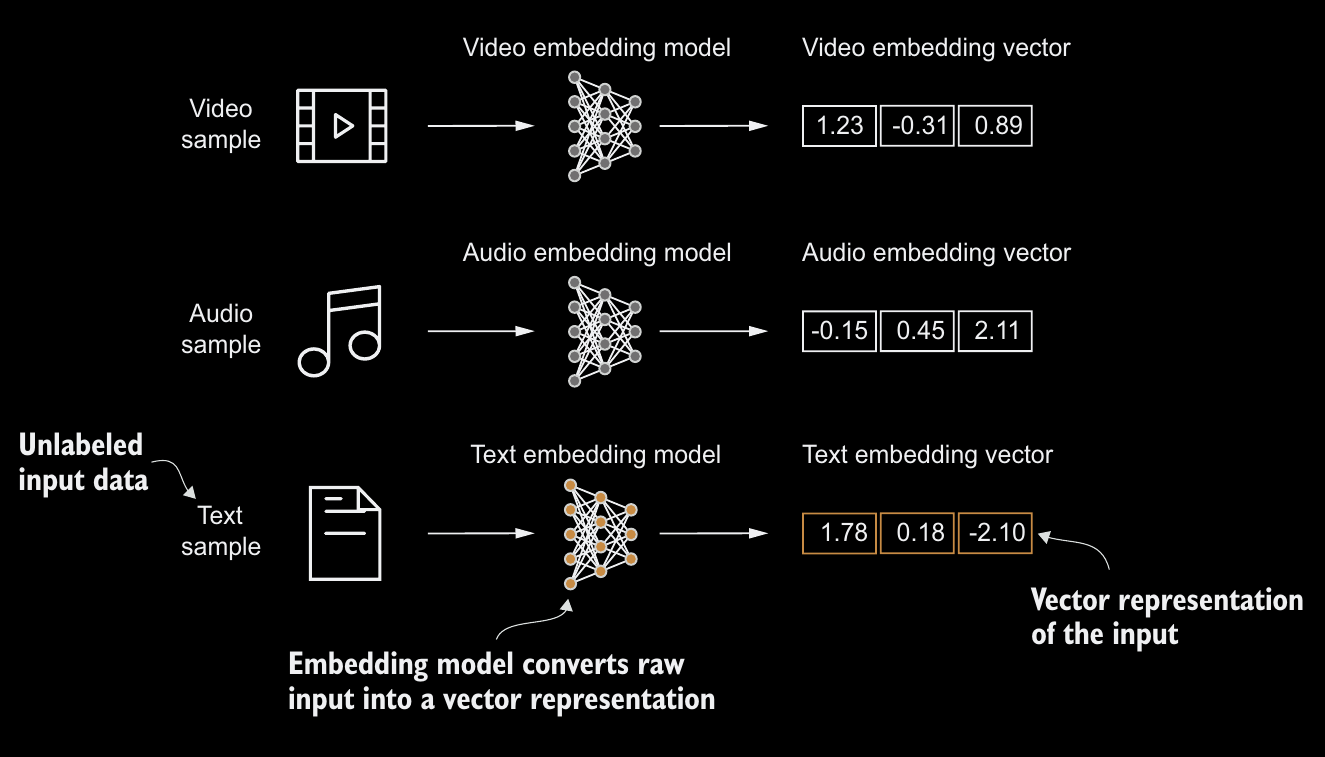

Word level embeddings are the most common type of text embeddings. There also exists embeddings for sentences, paragraphs, or whole documents.  

$Word2Vec$: Trained NN architecture to generate word embedding by predicting the context of a word given the target word or vice versa. Words that appear similar in context have similar meanings.

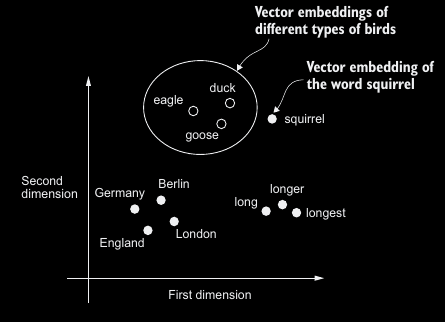

LLMs commonly produce their own embeddings that are part of the input layer and are updated during training. The advantage of optimizing
the embeddings as part of the LLM training instead of using Word2Vec is that the
embeddings are optimized to the specific task and data at hand.

The smallest GPT-2 models (117M
and 125M parameters) use an embedding size of 768 dimensions to provide con-
crete examples. The largest GPT-3 model (175B parameters) uses an embedding
size of 12,288 dimensions.

# Tokenization
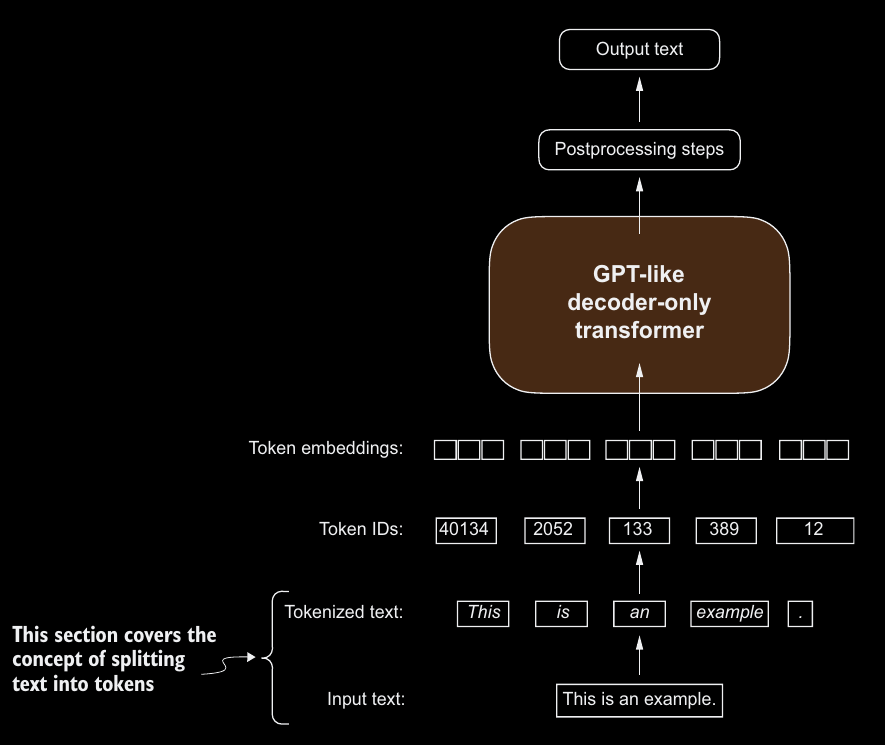

To understand the process of tokenization we will tokenize: https://en.wikisource.org/wiki/The_Verdict

In [ ]:
# Download the file
import urllib.request
url = ("https://raw.githubusercontent.com/rasbt/"
"LLMs-from-scratch/main/ch02/01_main-chapter-code/"
"the-verdict.txt")
file_path = "the-verdict.txt"
urllib.request.urlretrieve(url, file_path)

('the-verdict.txt', <http.client.HTTPMessage at 0x7f82b0597890>)

In [ ]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
  raw_text = f.read()
print("Total number of character:", len(raw_text))
print(raw_text[:100])

Total number of character: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no g


Our goal is to tokenize this 20479 character short story

In [ ]:
# Using regular expression as tokenizer
import re
text = "Hello world. This, Is this-- a test."
result = re.split(r'([,.:;?_!"()\']|--|\s)',text)
result = [item for item in result if item.strip()] # Removing any white space character
print(result)

['Hello', 'world', '.', 'This', ',', 'Is', 'this', '--', 'a', 'test', '.']


In [ ]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(len(preprocessed))

4690


In [ ]:
print(preprocessed[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


Converting tokens into token IDs:
To map the previously generated tokens into token IDs, we have to build a vocabu-
lary first. This vocabulary defines how we map each unique word and special character
to a unique integer

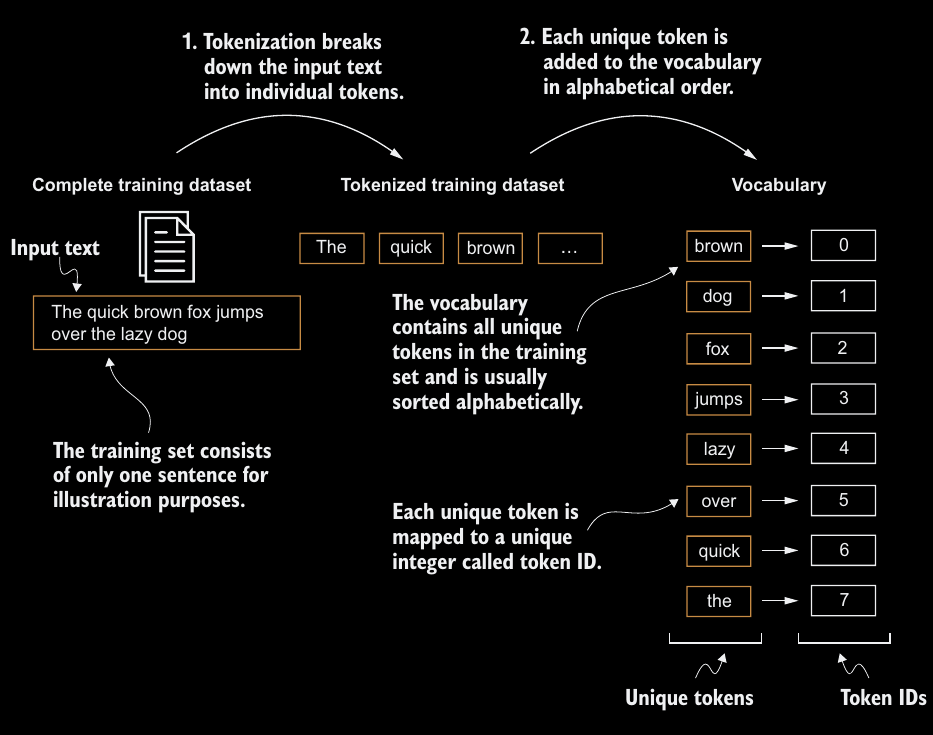

Vocabulary is build by tokenizing the entire text in a training dataset into individual tokens. These individual tokens are them sorted alphabetically, and duplicate tokens are removed. The unique tokens are then aggregated into a vocabulary that defines a mapping from each unique token to a unique intiger value.

In [ ]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)
print(vocab_size)

1130


In [ ]:
vocab = {token: integer for integer, token in enumerate(all_words)}
for i, item in enumerate(vocab.items()):
  print(item)
  if i >=50:
    break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


In [ ]:
print(vocab)

{'!': 0, '"': 1, "'": 2, '(': 3, ')': 4, ',': 5, '--': 6, '.': 7, ':': 8, ';': 9, '?': 10, 'A': 11, 'Ah': 12, 'Among': 13, 'And': 14, 'Are': 15, 'Arrt': 16, 'As': 17, 'At': 18, 'Be': 19, 'Begin': 20, 'Burlington': 21, 'But': 22, 'By': 23, 'Carlo': 24, 'Chicago': 25, 'Claude': 26, 'Come': 27, 'Croft': 28, 'Destroyed': 29, 'Devonshire': 30, 'Don': 31, 'Dubarry': 32, 'Emperors': 33, 'Florence': 34, 'For': 35, 'Gallery': 36, 'Gideon': 37, 'Gisburn': 38, 'Gisburns': 39, 'Grafton': 40, 'Greek': 41, 'Grindle': 42, 'Grindles': 43, 'HAD': 44, 'Had': 45, 'Hang': 46, 'Has': 47, 'He': 48, 'Her': 49, 'Hermia': 50, 'His': 51, 'How': 52, 'I': 53, 'If': 54, 'In': 55, 'It': 56, 'Jack': 57, 'Jove': 58, 'Just': 59, 'Lord': 60, 'Made': 61, 'Miss': 62, 'Money': 63, 'Monte': 64, 'Moon-dancers': 65, 'Mr': 66, 'Mrs': 67, 'My': 68, 'Never': 69, 'No': 70, 'Now': 71, 'Nutley': 72, 'Of': 73, 'Oh': 74, 'On': 75, 'Once': 76, 'Only': 77, 'Or': 78, 'Perhaps': 79, 'Poor': 80, 'Professional': 81, 'Renaissance': 82, 'Ri

Since we also want to conver the outputs of LLMs from numbers bacak into text, we need a way to turn token IDs into text. For this purpose we create an inverse version of the vocabulary that maps token IDs back to the correcponding text tokens.

In [ ]:
# Implementing a spmple text tokenizer
class SimpleTokenizerV1:
  def __init__(self, vocab):
    self.str_to_int = vocab
    self.int_to_str = {i:s for s, i in vocab.items()}

  def encode(self, text):
    preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)
    preprocessed = [
        item.strip() for item in preprocessed if item.strip()
        ]
    ids = [self.str_to_int[s] for s in preprocessed]
    return ids

  def decode(self, ids):
    text = " ".join([self.int_to_str[i] for i in ids])
    text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
    return text


In [ ]:
# Trying out the new tokenizer
tokenizer = SimpleTokenizerV1(vocab)
trial = """"It's the last he painted, you know,"
Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(trial)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [ ]:
text1 = tokenizer.decode(ids)
print(text1)

" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


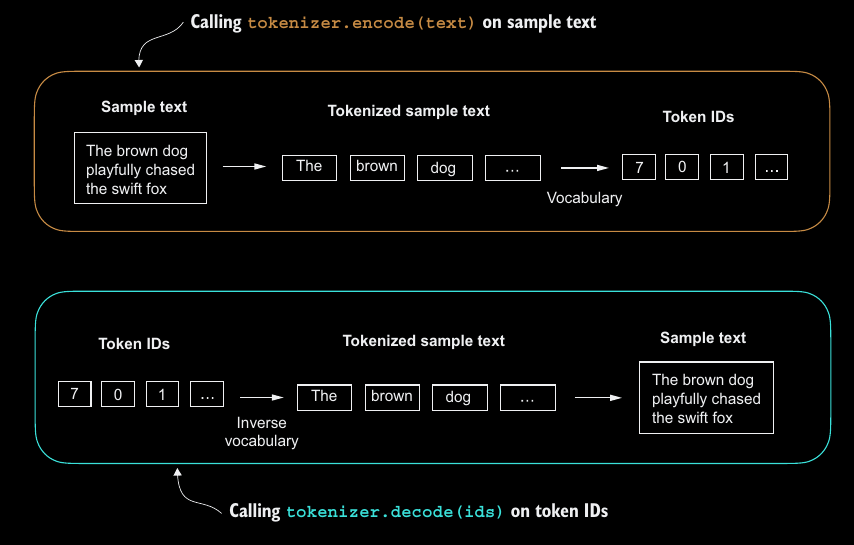

The problem with the tokenizer we have created is that it cannot handle unknown words. This we need to create a tokenizer that can handle unknown words. We also need to address the usage of addition of special context tokens that can enhance model understanding of the context or any other relevant information.

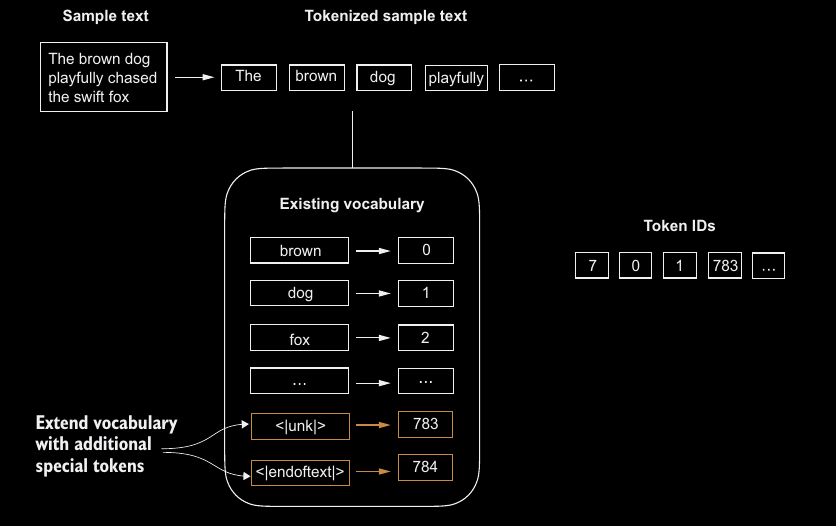

We add special tokens to a vocabulary to deal with certain contexts. For eg we add $<|unk|>$ token to represent a new unknown words that were not in out traning data and we add $<|endoftext|>$ token that can seperate two unrelated text sources. The latter helps in training when two completly unrelated documents are concatenated for training.

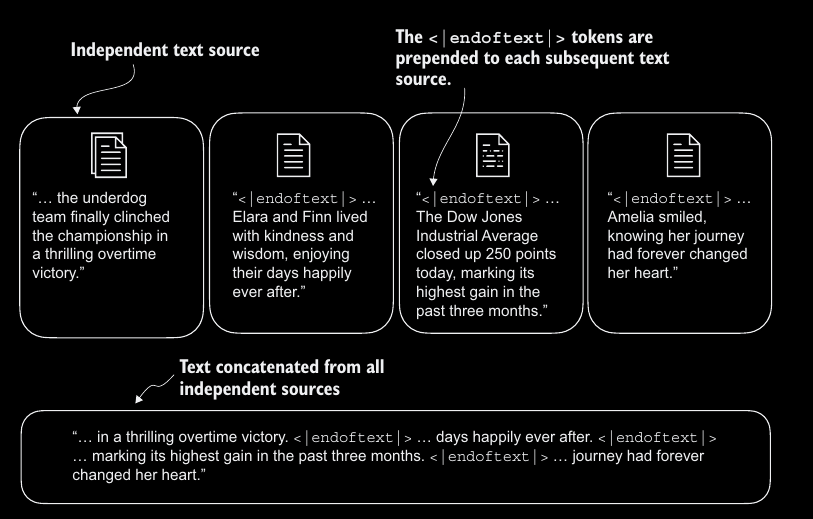

In [ ]:
# Modifying the vocabulary by adding <|endoftext|>
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>","<|unk|>"])
vocab = {token: integer for integer, token in enumerate(all_tokens)}
print(len(vocab.items()))

1132


In [ ]:
# Adjusting our tokenizer
class SimpleTokenizerV2:
  def __init__(self, vocab):
    self.str_to_int = vocab
    self.int_to_str = {i:s for s,i in vocab.items()}

  def encode(self,text):
    preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
    preprocessed = [
        item.strip() for item in preprocessed if item.strip()
    ]
    preprocessed = [item if item in self.str_to_int
                    else "<|unk|>" for item in preprocessed
                    ]
    ids = [self.str_to_int[s] for s in preprocessed]
    return ids

  def decode(self, ids):
    text = " ".join([self.int_to_str[i] for i in ids])

    text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text)
    return text

In [ ]:
text1 = "There is nothing imposibe to him who will try -- Alexander the great"
text2 = "I am Alexander the great and I will not stop until there are no more worlds to conquer"
text = "<|endoftext|>".join((text1, text2))
print(text)

There is nothing imposibe to him who will try -- Alexander the great<|endoftext|>I am Alexander the great and I will not stop until there are no more worlds to conquer


In [ ]:
tokenizer = SimpleTokenizerV2(vocab)
print(tokenizer.encode(text))

[95, 584, 713, 1131, 1016, 546, 1097, 1131, 1131, 6, 1131, 988, 1131, 150, 1131, 988, 508, 157, 53, 1131, 711, 1131, 1131, 992, 169, 709, 685, 1131, 1016, 1131]


In [ ]:
print(tokenizer.decode(tokenizer.encode(text)))

There is nothing <|unk|> to him who <|unk|> <|unk|> -- <|unk|> the <|unk|> am <|unk|> the great and I <|unk|> not <|unk|> <|unk|> there are no more <|unk|> to <|unk|>


Depending on the type of LLM used additional tokens are also considered:

$[BOS]$ *(beginning of sequence)*—This token marks the start of a text. It signifies to
the LLM where a piece of content begins.

$[EOS]$ *(end of sequence)*—This token is positioned at the end of a text and
is especially useful when concatenating multiple unrelated texts, similar to
<|endoftext|>. For instance, when combining two different Wikipedia arti-
cles or books, the [EOS] token indicates where one ends and the next begins.

$[PAD]$ *(padding)*—When training LLMs with batch sizes larger than one, the
batch might contain texts of varying lengths. To ensure all texts have the same
length, the shorter texts are extended or “padded” using the [PAD] token, up to
the length of the longest text in the batch.

## Byte pair encoding

used: https://github.com/openai/tiktoken
to implement byte pair encoding algorithm

In [ ]:
import tiktoken

In [ ]:
tokenizer = tiktoken.get_encoding("gpt2")

In [ ]:
text = (
    """There is nothiing impossible to him who will try --Alexander the great<|endoftext|> I am
        Alexander the great and I will not stop until there are no more worlds to conquor."""
        )

integers = tokenizer.encode(text, allowed_special = {"<|endoftext|>"})
print(integers)

[1858, 318, 407, 5303, 278, 5340, 284, 683, 508, 481, 1949, 1377, 38708, 262, 1049, 50256, 314, 716, 198, 220, 220, 220, 220, 220, 220, 220, 10009, 262, 1049, 290, 314, 481, 407, 2245, 1566, 612, 389, 645, 517, 11621, 284, 20277, 273, 13]


In [ ]:
strings = tokenizer.decode(integers)
print(strings)

There is nothiing impossible to him who will try --Alexander the great<|endoftext|> I am
        Alexander the great and I will not stop until there are no more worlds to conquor.


The BPE tokenizer has a total vocabulary size of 50,257.

Workings of BPE:

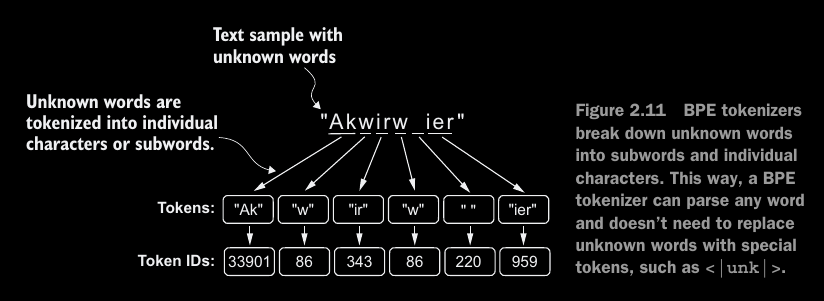

BPE can deal with words that aren't in its predefined vocabulary by breaking unknown words into smaller sub words units enabling it to handle out of vocabulary.

In [ ]:
random_word = " Akwirw ier"
print(tokenizer.encode(random_word))

[9084, 86, 343, 86, 220, 959]


In [ ]:
print(tokenizer.decode(tokenizer.encode(random_word)))

 Akwirw ier


BPE starts with adding all indi-
vidual single characters to its vocabulary (“a,” “b,” etc.). In the next stage, it merges
character combinations that frequently occur together into subwords. For example,
“d” and “e” may be merged into the subword “de,” which is common in many English. words like “define,” “depend,” “made,” and “hidden.” The merges are determined by
a frequency cutoff.

***Data Sampling with a sliding window***

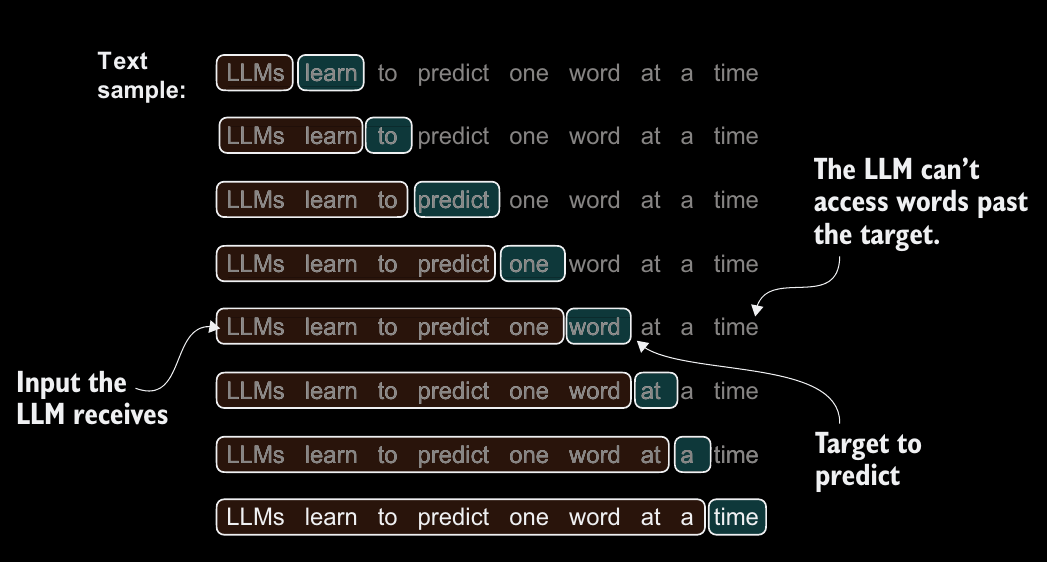

LLMs are trained by predicting the next word in a text.

Given a text sample, extract input blocks as subsamples that serve as input to the LLM, and the LLM's prediction task during training is to predict the next word that follows the input block. During training we mask out all the words that are past the target.  

In [ ]:
# Implement a data loader that fetches the input-target pairs from the training dataset using a sliding window approach
# First we tokenizer the whole "The verdict" short story using BPE tokenizer.
with open("the-verdict.txt", "r", encoding = "utf-8") as f:
  raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [ ]:
enc_sample = enc_text[50:]

In [ ]:
# Creating input-target pair
context_size = 4 # determines how many tokens are included in input
x = enc_sample[:context_size] # Contains input tokens
y = enc_sample[1:context_size+1] # Contains the targets, which are the inputs shifted by 1
print(f"x: {x}")
print(f"y:      {y}")

x: [290, 4920, 2241, 287]
y:      [4920, 2241, 287, 257]


By processing the inputs along with the targets, which are inputs shifted by one position we can create the next-word prediction tasks:

In [ ]:
for i in range(1, context_size+1):
  context = enc_sample[:i]
  desired = enc_sample[i]
  print(context, "---->", desired) # (input, "---->", "output")

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [ ]:
for i in range(1, context_size+1):
  context = enc_sample[:i]
  desired = enc_sample[i]
  print(tokenizer.decode(context),"---->", tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


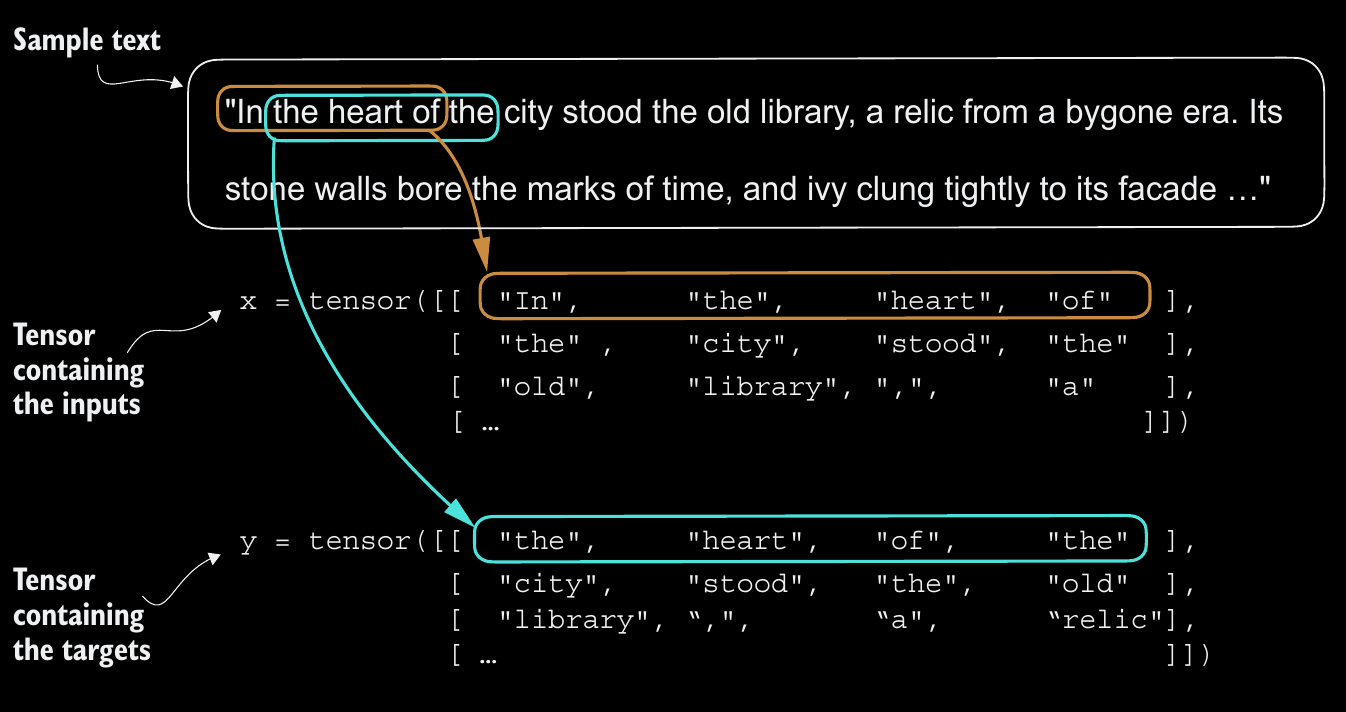

Before we can convert tokens into embeddings our goal is to implement an efficient dataloader that iterates over the input dataset and returns the inputs and targets in PyTorch tensors.

we want two tensors: an input tensor containing the text that LLM sees and a target tensor that includes the targets for the LLM to predict

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
class GPTDatasetV1(Dataset):
  def __init__(self,txt, tokenizer, max_length, stride):
    self.input_ids = []
    self.target_ids = []

    token_ids = tokenizer.encode(txt)

    for i in range(0, len(token_ids) - max_length, stride):
      # Uses a sliding window to chunk the book into overlapping sequences of max_length
      input_chunk = token_ids[i:i+max_length]
      target_chunk = token_ids[i+1:i+max_length+1]
      self.input_ids.append(torch.tensor(input_chunk))
      self.target_ids.append(torch.tensor(target_chunk))

  def __len__(self):
    # Returns the total number of rows in dataset
    return len(self.input_ids)

  def __getitem__(self, idx):
    # Returns a single row from the dataset
    return self.input_ids[idx], self.target_ids[idx]

In [ ]:
# A data loader to generate batches with input-with pair
def create_dataloader_v1(txt, batch_size = 4, max_length = 256, stride = 128,
                         shuffle = True, drop_last = False, num_workers = 0):
  tokenizer = tiktoken.get_encoding("gpt2") # initialize the tokenizer
  dataset = GPTDatasetV1(txt, tokenizer, max_length, stride) # Creates dataset
  dataloader = DataLoader(
      dataset,
      batch_size = batch_size,
      shuffle = shuffle,
      drop_last = drop_last, # drops_last = True drops the last batch if it is shorter than the specified batch_size to prevent loss spikes during trainig
      num_workers = num_workers # The number fo CPU process to use for preprocessing
  )
  return dataloader

In [ ]:
dataloader = create_dataloader_v1(
    raw_text, batch_size = 1, max_length = 4, stride = 1, shuffle = False
)
data_iter = iter(dataloader) # Converts the dataloader into a python iterator to fetch the next entry via python's build in next() function
first_batch = next(data_iter)
print(first_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


The first_batch variable contains two tensors: the first tensor stores the input token
IDs, and the second tensor stores the target token IDs. Since the max_length is set to
4, each of the two tensors contains four token IDs.

In [ ]:
# stride setting dictates the number of postions the inputs shift accross batches emulating a sliding windoew approach
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


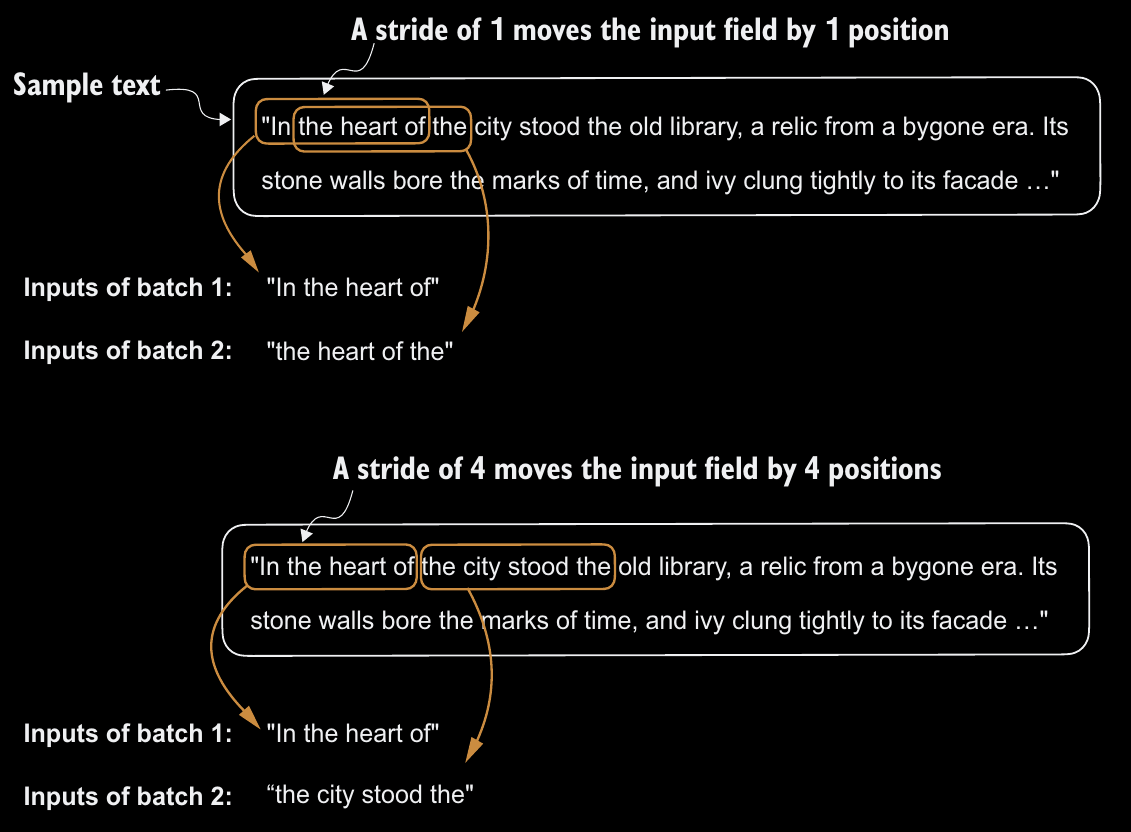

In [ ]:
dataloader = create_dataloader_v1(
    raw_text, batch_size = 8, max_length = 4, stride = 4,
    shuffle = False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


More overlapping between words could lead to overfitting

# Creating Embeddings

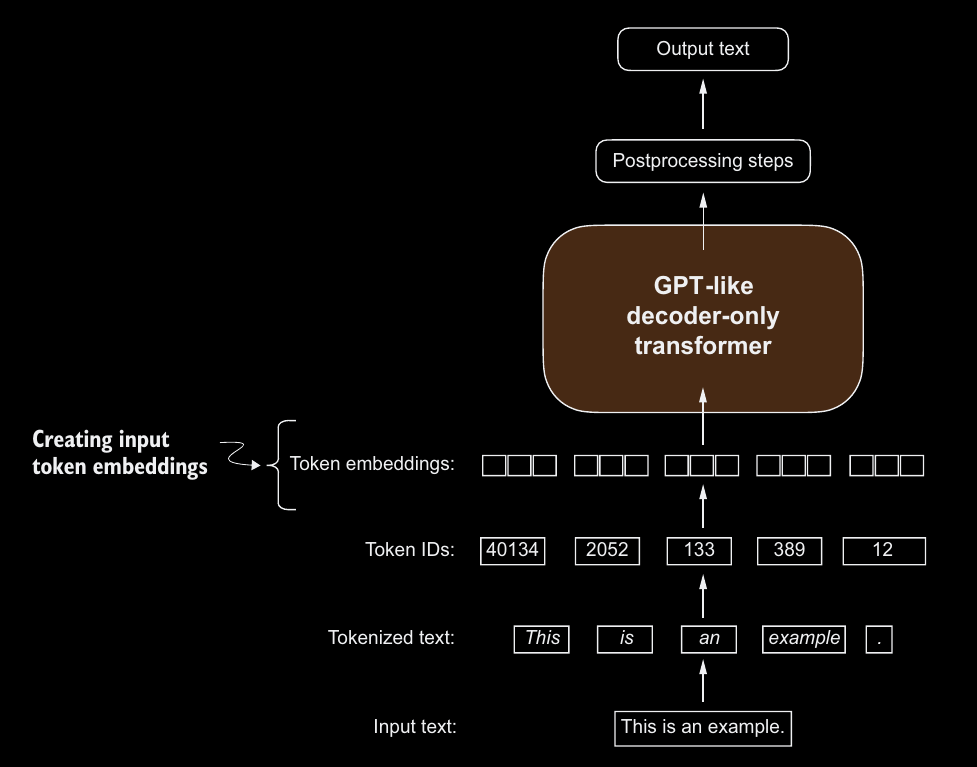

The last step in preparing the input text for LLM training is to convert token IDs into embedding vectors. As a preliminary step we must initialize those embedding vector weights with random values.

In [ ]:
# Basics of token ID
input_ids = torch.tensor([2,3,5,1])
vocab_size = 6
output_dim = 3
torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


The values of the embedding layer contains small, random values that are optimized during LLM training as a part of LLM optimization itself.

In [ ]:
# apply token ID to obtain the embedding vector
print(embedding_layer(torch.tensor([[3]])))

tensor([[[-0.4015,  0.9666, -1.1481]]], grad_fn=<EmbeddingBackward0>)


In [ ]:
print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


***Encoding word positions :***
The self attention mechanism doesn't have a notion of positions of tokens within a sequence. Same token ID always gets mapped to the same vector representation, regardless of where the token ID is positioned in the input sequence.


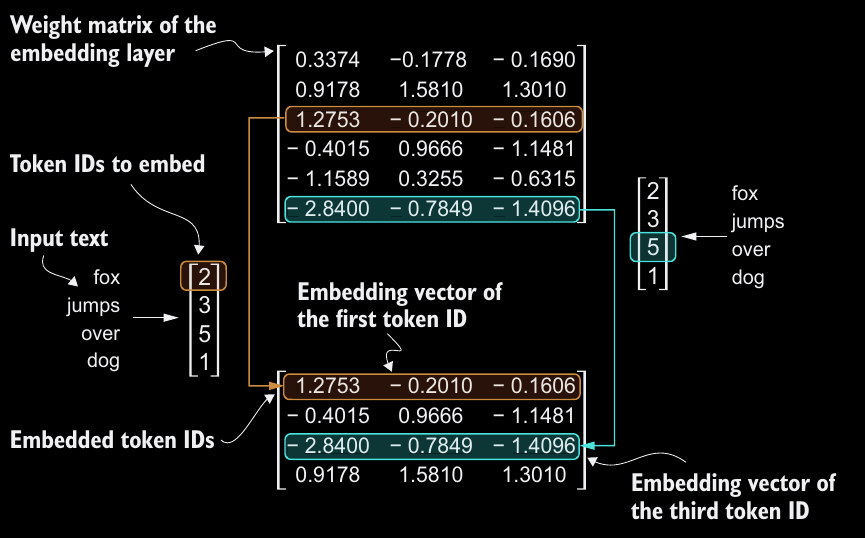

**Embedding layers perform a lookup operation, retriving the embedding vector corresponding to the token ID from the embedding layer's weight matrix.**

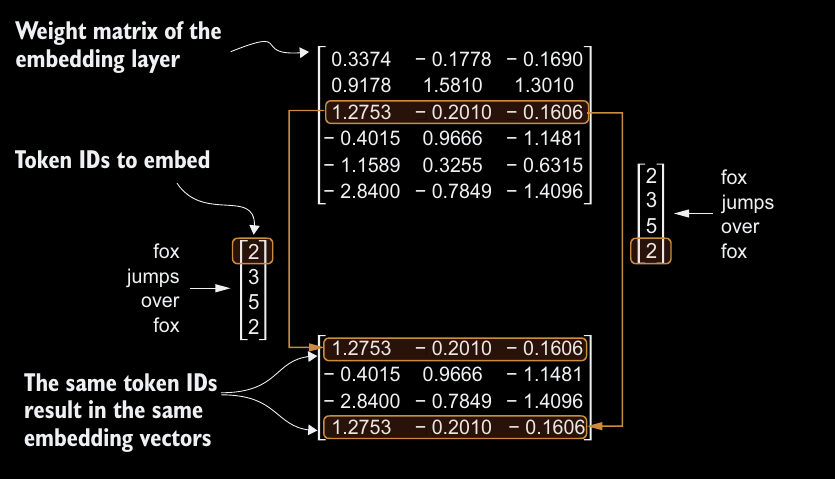

**The embedding layer converts token ID into the same vector representation regardless of where it is located in the input sequence.**

In principle, the deterministic, position-independent embedding of the token ID is good for reproducibility purposes. Since the self-attention mechanism of the LLMs itself is also position agnostic, it is helpful to inject positional information into the LLM.

There are two broad categories of positional aware embedding: **relative positional embeddings** and **absolute positional embedding**.

**absolute positional embedding**: Directly associated with specific positions in a sequence. For each position in the input sequence, a unique embedding is added to the token's embedding to convey its exact location.

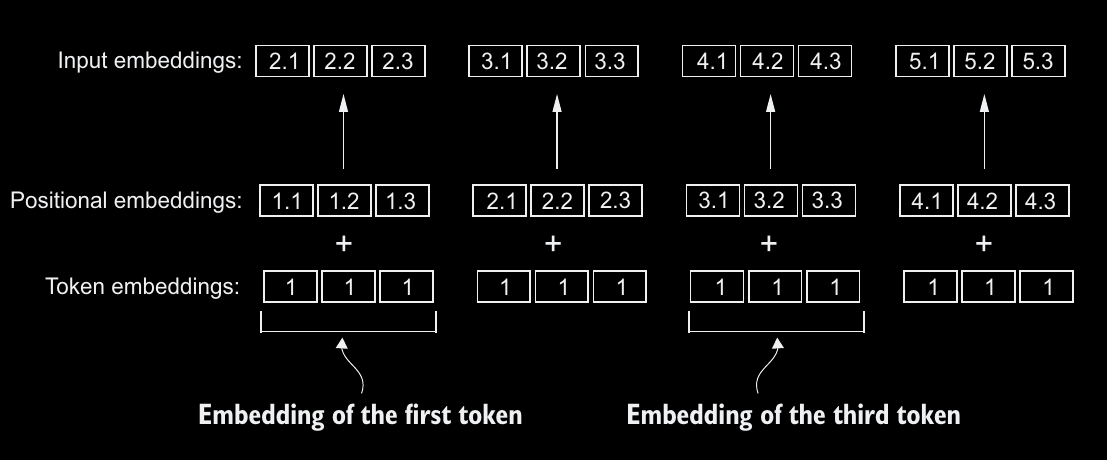

**relative positional embedding:** Instead of focusing on the absolute position of a token, the emphasis of relative positional embedding is on the relative position or distance between tokens. This means the model learns the relation ship in terms of "how far apart" rathern than at "which exact position".

In [ ]:
vocab_size = 50257
output_dim = 256
token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [ ]:
max_length = 4
dataloader = create_dataloader_v1(raw_text, batch_size = 8, max_length = max_length,
                                  stride = max_length, shuffle = False)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Token IDs:\n", inputs)
print("\nInputs shape:\n",inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])


In [ ]:
print(targets)

tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


In [ ]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [ ]:
token_embeddings

tensor([[[ 0.4913,  1.1239,  1.4588,  ..., -0.3995, -1.8735, -0.1445],
         [ 0.4481,  0.2536, -0.2655,  ...,  0.4997, -1.1991, -1.1844],
         [-0.2507, -0.0546,  0.6687,  ...,  0.9618,  2.3737, -0.0528],
         [ 0.9457,  0.8657,  1.6191,  ..., -0.4544, -0.7460,  0.3483]],

        [[ 1.5460,  1.7368, -0.7848,  ..., -0.1004,  0.8584, -0.3421],
         [-1.8622, -0.1914, -0.3812,  ...,  1.1220, -0.3496,  0.6091],
         [ 1.9847, -0.6483, -0.1415,  ..., -0.3841, -0.9355,  1.4478],
         [ 0.9647,  1.2974, -1.6207,  ...,  1.1463,  1.5797,  0.3969]],

        [[-0.7713,  0.6572,  0.1663,  ..., -0.8044,  0.0542,  0.7426],
         [ 0.8046,  0.5047,  1.2922,  ...,  1.4648,  0.4097,  0.3205],
         [ 0.0795, -1.7636,  0.5750,  ...,  2.1823,  1.8231, -0.3635],
         [ 0.4267, -0.0647,  0.5686,  ..., -0.5209,  1.3065,  0.8473]],

        ...,

        [[-1.6156,  0.9610, -2.6437,  ..., -0.9645,  1.0888,  1.6383],
         [-0.3985, -0.9235, -1.3163,  ..., -1.1582, -1.13

In [ ]:
context_length = max_length # Context length is a variable that represents the supported input size of LLMs
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
pos_embedding = pos_embedding_layer(torch.arange(context_length))
print(pos_embedding)
print(pos_embedding.shape)

tensor([[ 1.9192, -0.0239, -1.3632,  ...,  1.0244,  0.6319, -0.2026],
        [ 1.0580, -0.1855,  0.5553,  ...,  0.0593, -1.2205,  0.7917],
        [ 0.3932,  0.1786, -0.4253,  ...,  1.4493, -0.8674,  0.8658],
        [ 0.4966, -1.9540, -1.0235,  ...,  1.1835,  1.0848,  0.1064]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 256])


In [ ]:
input_embeddings = token_embeddings+pos_embedding
print(input_embeddings.shape)

torch.Size([8, 4, 256])


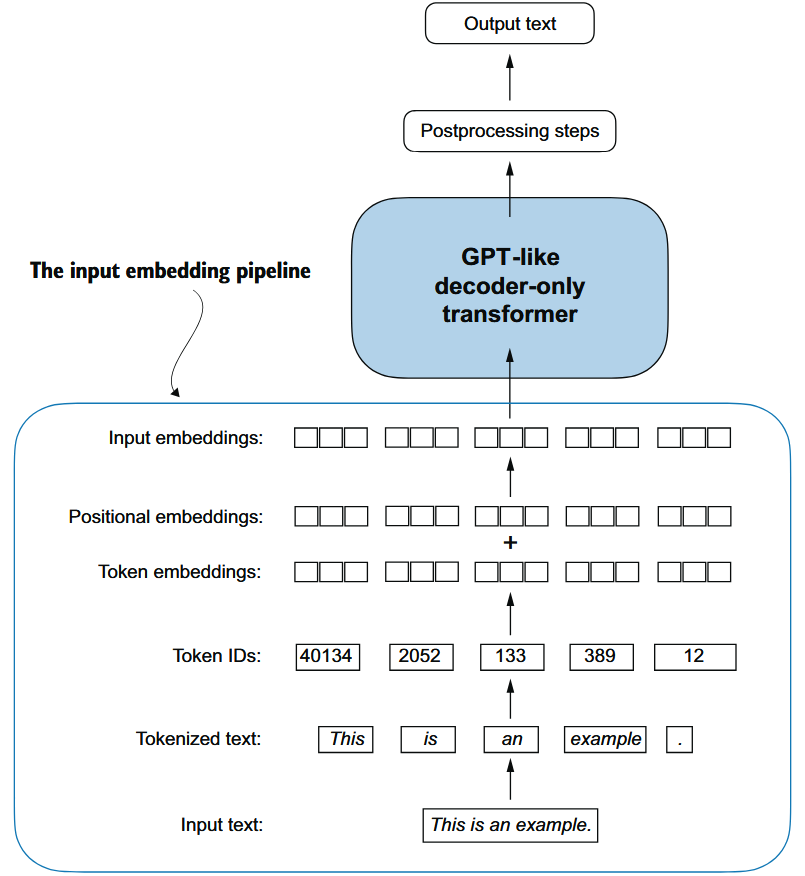